# Exercise Solutions

In [28]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()   # storing dataset
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [30]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names) # creating dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


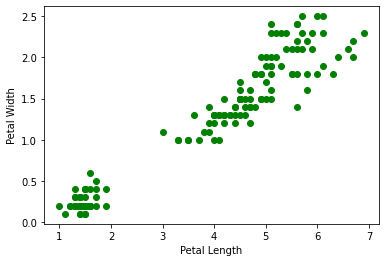

In [31]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df['petal length (cm)'], df['petal width (cm)'],color="green") # Visualizing to identify cluster

** We can see, there is three cluster**
### We will use only petal's length and width for our practice pupose (K Mean Clustering)

In [32]:
df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns',inplace=True)
# Dropping unnecessery columns for simplicity
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [10]:
df.shape

(150, 2)

In [33]:
km = KMeans(n_clusters=3) # passing number of cluster parameter, as we can see in plot. It's 3.
km 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']]) # Fit & predict for nsupervised learning
y_predicted  # Here, 0,1,2 are our desired cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
df['Cluster']=y_predicted   # Appending cluster column that our model predicted
df.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [36]:
km.cluster_centers_    # this parameter shows the location of centroids

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [37]:
df1 = df[df.Cluster==0]  # Creating 3 dataframes for 3 clusters
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

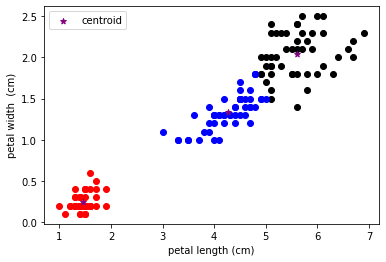

In [38]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='black') # Visualizing clusters
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'],color='blue')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width  (cm)')
# Let's plot our centroids also
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

### Scaling & re-Train

In [39]:
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']]) # This will convert the scale in between 0 to 1 # scaling income
 
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']]) # scaling age
df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [41]:
df.Cluster.unique()

array([1, 2, 0])

In [42]:
# Again training with our proper scaled dataset
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
df['Cluster']=y_predicted # Updating cluster values with our new trained output
df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [44]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

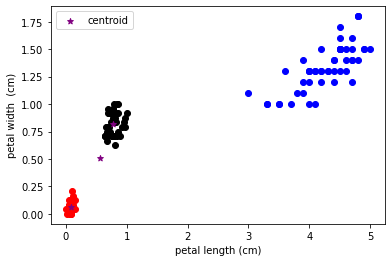

In [45]:
df1 = df[df.Cluster==0]  # Creating 2 dataframes for 2 clusters
df2 = df[df.Cluster==1]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='black') # Visualizing clusters
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'],color='blue')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width  (cm)')
# Let's plot our centroids also
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**So, Scaling is not useful in this case**

## Elbow Plot

In [24]:
sse = []                 # Calculating Sum of Square Error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)   # model.interia gives us the value of SSE

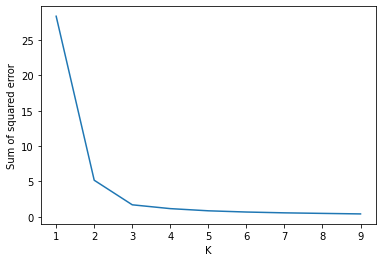

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)